In [1]:
import sys, os #imp
from functools import reduce
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import nasdaqdatalink as ndl
import yaml
from tools.instruments import instruments, Quotes
from tools.constants import SRF_CONTINUOUS_BO_DB_PATH
from tools.display import ohlc_chart, view, oi_chart, metrics_chart, index_chart
import backtesting as bt
import re
from tools.display import MyFormatter

In [2]:
with open('03.전략연구/systems/system2.yaml', encoding='utf-8') as f:
    system1 = yaml.load(f, Loader=yaml.FullLoader)
    print(system1)

{'name': 'testSystem', 'description': '시스템 설명', 'sectors': 'default', 'instruments': ['AD'], 'from_date': '2019-08-01', 'to_date': None, 'principal': 1000000, 'heat_system': 'DefaultHeat', 'max_system_heat': 0.3, 'max_sector_heat': 0.3, 'max_trade_heat': 0.1, 'max_lots': 1, 'commission': 5.98, 'skid': 0.25, 'metrics': [['ema30', 'EMA', 'window=30'], ['ema5', 'EMA', 'window=5'], ['min30', 'MIN', 'window=30'], ['max300', 'MAX', 'window=300']], 'entry_rule': {'long': None, 'short': 'ema5>ema30'}, 'exit_rule': {'long': None, 'short': 'ema5<ema30'}, 'stop_rule': {'long': None, 'short': 'max300'}}


In [3]:
trader = bt.Trader(quotes_style='bo', systems=[system1])
system = trader.systems[0]

In [4]:
%%time
trader.run()

매매시작
거래일: 2019-08-01 00:00:00, 시스템: testSystem 3.9015939235687256sec
거래일: 2019-08-02 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2019-08-05 00:00:00, 시스템: testSystem 0.0009953975677490234sec
거래일: 2019-08-06 00:00:00, 시스템: testSystem 0.0019903182983398438sec
거래일: 2019-08-07 00:00:00, 시스템: testSystem 0.001971006393432617sec
거래일: 2019-08-08 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2019-08-09 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2019-08-12 00:00:00, 시스템: testSystem 0.0019948482513427734sec
거래일: 2019-08-13 00:00:00, 시스템: testSystem 0.0019960403442382812sec
거래일: 2019-08-14 00:00:00, 시스템: testSystem 0.0009958744049072266sec
거래일: 2019-08-15 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2019-08-16 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2019-08-19 00:00:00, 시스템: testSystem 0.0019948482513427734sec
거래일: 2019-08-20 00:00:00, 시스템: testSystem 0.0019948482513427734sec
거래일: 2019-08-21 00:00:00, 시스템: testSystem 0.000997304916381836sec


거래일: 2020-05-08 00:00:00, 시스템: testSystem 0.002990245819091797sec
거래일: 2020-05-11 00:00:00, 시스템: testSystem 0.0029921531677246094sec
거래일: 2020-05-12 00:00:00, 시스템: testSystem 0.0029921531677246094sec
거래일: 2020-05-13 00:00:00, 시스템: testSystem 0.002992868423461914sec
거래일: 2020-05-14 00:00:00, 시스템: testSystem 0.0030193328857421875sec
거래일: 2020-05-15 00:00:00, 시스템: testSystem 0.0029642581939697266sec
거래일: 2020-05-18 00:00:00, 시스템: testSystem 0.0030193328857421875sec
거래일: 2020-05-19 00:00:00, 시스템: testSystem 0.001995086669921875sec
거래일: 2020-05-20 00:00:00, 시스템: testSystem 0.0029916763305664062sec
거래일: 2020-05-21 00:00:00, 시스템: testSystem 0.0029916763305664062sec
거래일: 2020-05-22 00:00:00, 시스템: testSystem 0.0029926300048828125sec
거래일: 2020-05-25 00:00:00, 시스템: testSystem 0.0029916763305664062sec
거래일: 2020-05-26 00:00:00, 시스템: testSystem 0.0009930133819580078sec
거래일: 2020-05-27 00:00:00, 시스템: testSystem 0.0029964447021484375sec
거래일: 2020-05-28 00:00:00, 시스템: testSystem 0.002991914749145508sec

거래일: 2021-01-04 00:00:00, 시스템: testSystem 0.0029921531677246094sec
거래일: 2021-01-05 00:00:00, 시스템: testSystem 0.002991914749145508sec
거래일: 2021-01-06 00:00:00, 시스템: testSystem 0.0029921531677246094sec
거래일: 2021-01-07 00:00:00, 시스템: testSystem 0.003988981246948242sec
거래일: 2021-01-08 00:00:00, 시스템: testSystem 0.002993345260620117sec
거래일: 2021-01-11 00:00:00, 시스템: testSystem 0.0019936561584472656sec
거래일: 2021-01-12 00:00:00, 시스템: testSystem 0.002991914749145508sec
거래일: 2021-01-13 00:00:00, 시스템: testSystem 0.002991914749145508sec
거래일: 2021-01-14 00:00:00, 시스템: testSystem 0.002991914749145508sec
거래일: 2021-01-15 00:00:00, 시스템: testSystem 0.002991914749145508sec
거래일: 2021-01-18 00:00:00, 시스템: testSystem 0.0019948482513427734sec
거래일: 2021-01-19 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2021-01-20 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2021-01-21 00:00:00, 시스템: testSystem 0.0029921531677246094sec
거래일: 2021-01-22 00:00:00, 시스템: testSystem 0.002993345260620117sec
거래일: 

거래일: 2021-10-22 00:00:00, 시스템: testSystem 0.0029687881469726562sec
거래일: 2021-10-25 00:00:00, 시스템: testSystem 0.003989458084106445sec
거래일: 2021-10-26 00:00:00, 시스템: testSystem 0.0030205249786376953sec
거래일: 2021-10-27 00:00:00, 시스템: testSystem 0.003960847854614258sec
거래일: 2021-10-28 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일: 2021-10-29 00:00:00, 시스템: testSystem 0.003989458084106445sec
거래일: 2021-11-01 00:00:00, 시스템: testSystem 0.002991914749145508sec
거래일: 2021-11-02 00:00:00, 시스템: testSystem 0.0029916763305664062sec
거래일: 2021-11-03 00:00:00, 시스템: testSystem 0.0029921531677246094sec
거래일: 2021-11-04 00:00:00, 시스템: testSystem 0.002991914749145508sec
거래일: 2021-11-05 00:00:00, 시스템: testSystem 0.002991914749145508sec
거래일: 2021-11-08 00:00:00, 시스템: testSystem 0.0019948482513427734sec
거래일: 2021-11-09 00:00:00, 시스템: testSystem 0.002992391586303711sec
거래일: 2021-11-10 00:00:00, 시스템: testSystem 0.0029916763305664062sec
거래일: 2021-11-11 00:00:00, 시스템: testSystem 0.001994609832763672sec
거래일:

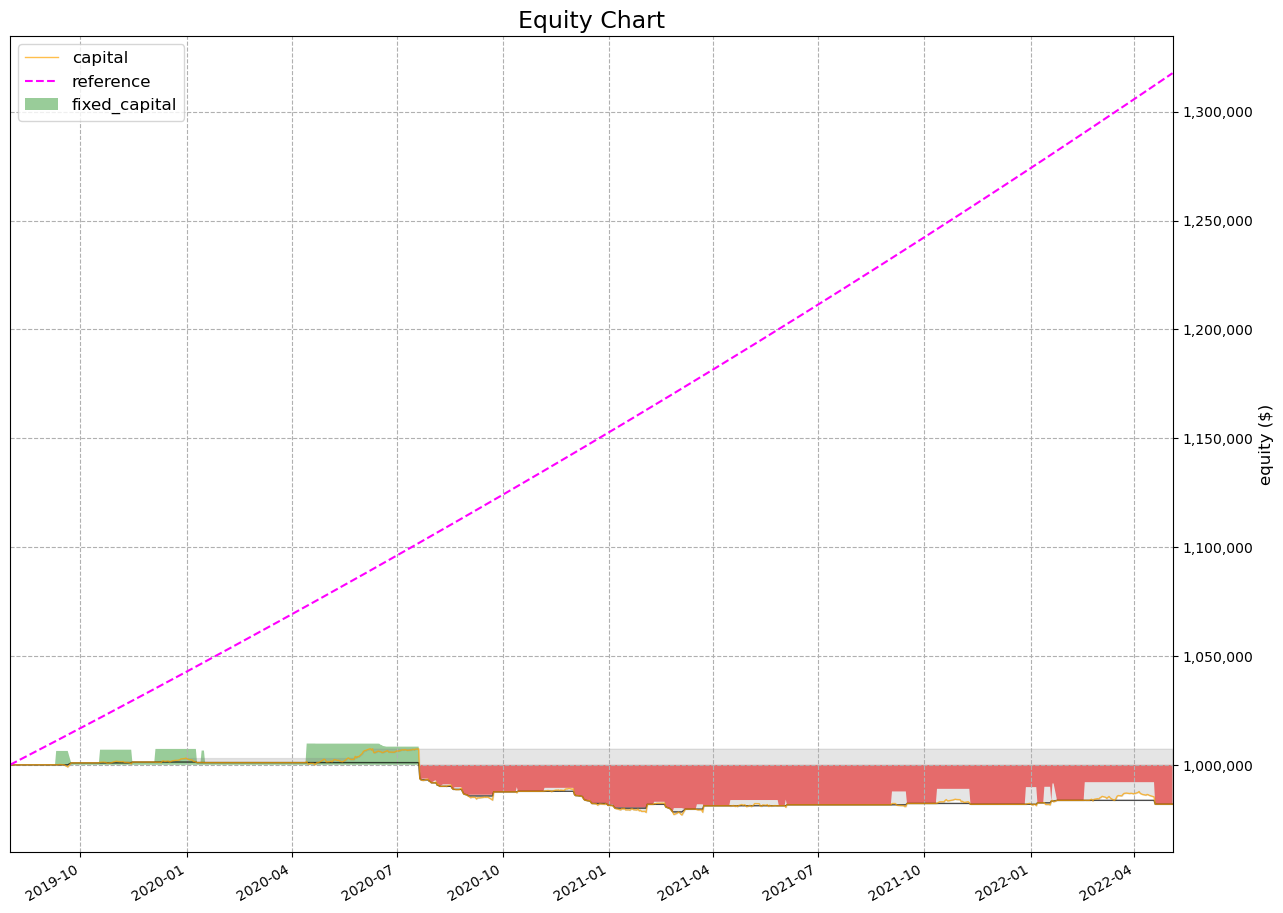

,투자금,최종자산,총손익,Bliss,CAGR,MDD,손익비,승률,위험대비손익,평균손익,평균수익,평균손실,보유기간,매매회수
Result,"1,000,000","981,938",-1.8%,-0.002,-0.7%,3.0%,-0.38,27.1%,-42.7%,-370,842,-820,10 일,48


In [5]:
system.summary(level=0)

In [6]:
system.summary(level=1)

,총손익,평균손익,표준편차,위험대비손익,승률,보유기간,매매회수
구분,,,,,,,
currency,-17775,-370,1298.48,-42.72%,27.1%,10.145833,48


,총손익,총손익(틱),평균손익(틱),위험대비손익,승률,보유기간,매매회수
결과,"-17,775","-3,555",-74,-42.72%,27.1%,10,48


,entrydate,exitdate,position,entryprice,entrylots,entryrisk,#exits,profit,profit_ticks,duration,result
0,2019-09-10,2019-09-23,Short,0.69205,1,6395.0,1,910.0,182,13,WIN
1,2019-10-18,2019-11-15,Short,0.68800,1,6070.0,1,390.0,78,28,WIN
2,2019-12-05,2020-01-10,Short,0.68835,1,6035.0,1,-225.0,-45,36,LOSE
3,2020-01-14,2020-01-17,Short,0.69345,1,5525.0,1,-25.0,-5,3,LOSE
4,2020-04-14,2020-07-21,Short,0.64160,1,8770.0,1,-7350.0,-1470,98,LOSE
5,2020-07-22,2020-07-22,Short,0.71615,1,555.0,1,-555.0,-111,0,LOSE
6,2020-07-23,2020-07-29,Short,0.71600,1,570.0,1,-570.0,-114,6,LOSE
7,2020-07-30,2020-07-30,Short,0.72065,1,245.0,1,-245.0,-49,0,LOSE
8,2020-07-31,2020-07-31,Short,0.72095,1,515.0,1,-515.0,-103,0,LOSE
9,2020-08-03,2020-08-05,Short,0.71535,1,1075.0,1,-1075.0,-215,2,LOSE


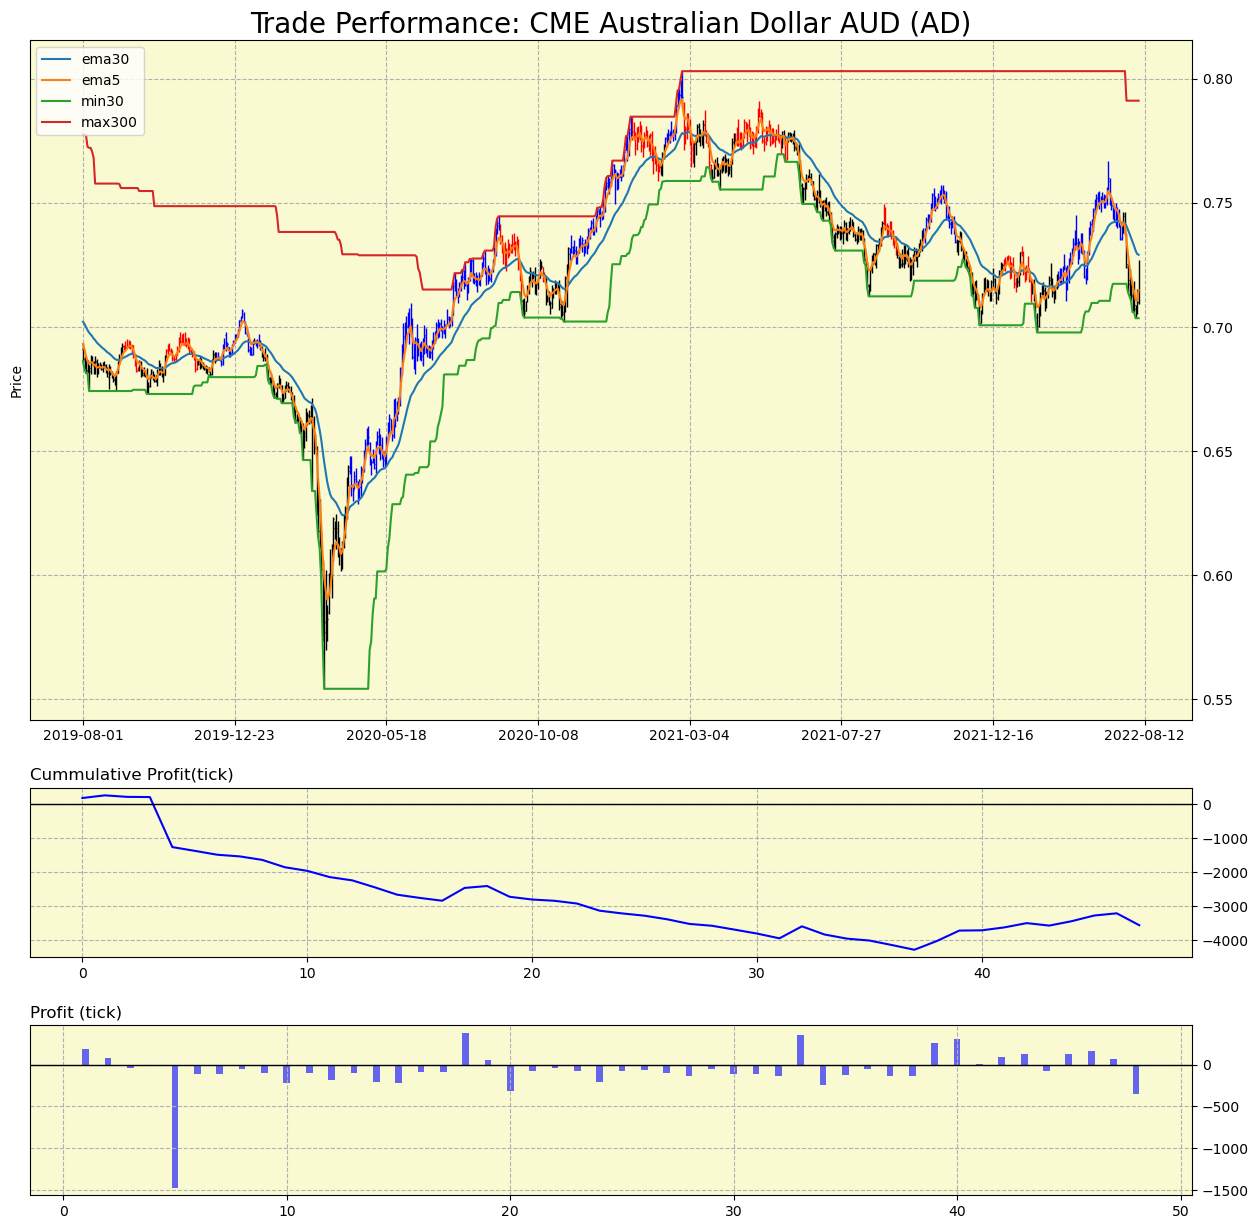

In [7]:
system.detail_result('AD')#, start='2015-10-01', end='2016-01-13')

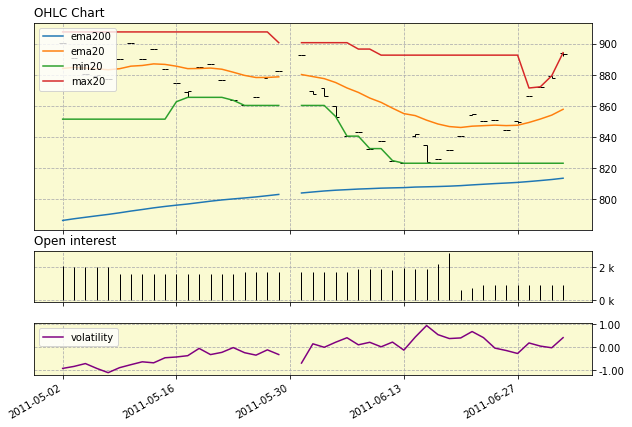

In [38]:
view(quotes, metrics=metrics)

In [9]:
system.signals

AD                    
           enter_long exit_long stop_long
date                                     
1959-08-03        NaN       NaN       NaN
1959-08-04        NaN       NaN       NaN
1959-08-05        NaN       NaN       NaN
1959-08-06        NaN       NaN       NaN
1959-08-07        NaN       NaN       NaN
...               ...       ...       ...
2022-04-28      False      True   0.70595
2022-04-29      False      True   0.70595
2022-05-02      False      True   0.70355
2022-05-03      False      True   0.70355
2022-05-04      False      True   0.70355

[16028 rows x 3 columns]

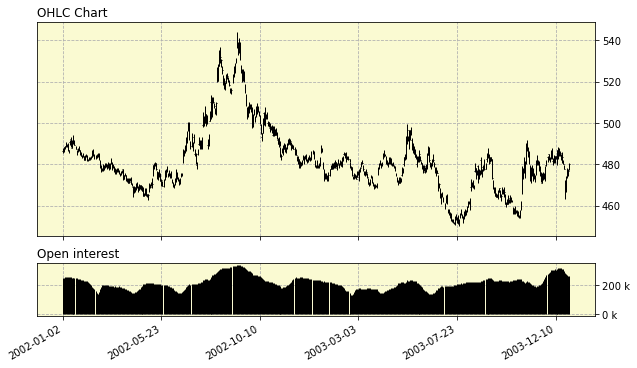

In [16]:
view(quotes)

In [21]:
quotes = trader.loc[start:end].dropna()
        tradelog = self.tradelog[self.tradelog.symbol == symbol]
        #tradelog = tradelog[tradelog.symbol == symbol]
        
        
        if start and end:
            trade = tradelog[ (start <= tradelog.entrydate) & (tradelog.exitdate <= end)]
        else:
            trade = tradelog
        
        cumprofit = trade.profit.cumsum()
        num_trades = len(trade)
        
        fig, (ax) = plt.subplots(2,1, figsize=(15,10),
                                gridspec_kw = {'height_ratios':[3,1]})
        
        #price chart
        ax[0] = ohlc_chart(ax[0], feed, linewidth=0.8)
        for idx, row in trade.iterrows():
            y=feed.loc[row['entrydate']:row['exitdate']]
            colors=['red','red'] if row['position']=='Long' else ['blue','blue']
            ax[0] = ohlc_chart(ax[0], y, colors=colors)
        ax[0].plot(feed[['top','bottom']].shift(1), color='green', linewidth=0.8)
        #tick profit chart
        ax[1].bar(np.arange(1,num_trades+1), np.where(trade.position=='Long', trade.tick, 0), 0.3, color='red', alpha=0.6 )
        ax[1].bar(np.arange(1,num_trades+1), np.where(trade.position=='Short', trade.tick, 0), 0.3, color='blue', alpha=0.6 )
           
        #labels
        name = self.pinfo[symbol]['name']
        ax[0].set_title(name, fontsize=20)
        ax[0].set_ylabel('Price', fontsize=15)
        ax[1].set_ylabel('Profit (tick)', fontsize=15)
       
        #styles
        ax[1].axhline(y=0, linewidth=1, color='darkgrey')
        ax[1].yaxis.tick_right()
        ax[1].set_facecolor('lightgoldenrodyellow')
        ax[1].set_xticks(range(1,num_trades+1))
        ax[1].grid(linestyle='--')

'NYMEX WTI Crude Oil'

In [24]:
table['duration'].mean()

35.285714285714285

In [25]:
df.columns

Index(['id', 'entrydate', 'name', 'symbol', 'sector', 'position', 'entryprice',
       'entrylots', 'entryrisk', 'entryrisk_ticks', 'exits', 'currentprice',
       'stopprice', 'risk', 'risk_ticks', 'lots', 'flame', 'profit',
       'duration', 'exittype', 'result', 'on_fire'],
      dtype='object')

In [6]:
df=pd.DataFrame(system.equity.log())

In [7]:
df2 = df.set_index('date')

In [46]:
from reportlab.pdfgen import canvas

In [57]:
def hello(c):
    c.drawString(100,100,"hello world")
    c.drawString(200,200,"안녕하세요")
    

In [58]:
c = canvas.Canvas("hello.pdf")

In [59]:
hello(c)

In [60]:
c.showPage()

In [61]:
c.save()

In [62]:
system

<<시스템: None>>

In [70]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter,A4
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont

fontname = 'Malgun Gothic'
pdfmetrics.registerFont(TTFont(fontname,'c:\Windows\fonts\malgun.ttf'))
p = canvas.Canvas('hello.pdf')
p.setFont(fontname,13)
p.drawString(100,100,u'안녕하세요')
p.showPage()
p.save() 

TTFError: Can't open file "c:\Windowsonts\malgun.ttf"

In [71]:
r"??df"

'??df'

In [64]:
import os

print(os.listdir(r'C:\Windows\fonts'))

['8514fix.fon', '8514fixe.fon', '8514fixg.fon', '8514fixr.fon', '8514fixt.fon', '8514oem.fon', '8514oeme.fon', '8514oemg.fon', '8514oemr.fon', '8514oemt.fon', '8514sys.fon', '8514syse.fon', '8514sysg.fon', '8514sysr.fon', '8514syst.fon', '85775.fon', '85855.fon', '85f1255.fon', '85f1256.fon', '85f1257.fon', '85f874.fon', '85s1255.fon', '85s1256.fon', '85s1257.fon', '85s874.fon', 'ahn_b.ttf', 'ahn_l.ttf', 'ahn_m.ttf', 'ALGER.TTF', 'ANTQUAB.TTF', 'ANTQUABI.TTF', 'ANTQUAI.TTF', 'app775.fon', 'app850.fon', 'app852.fon', 'app855.fon', 'app857.fon', 'app866.fon', 'app932.fon', 'app936.fon', 'app949.fon', 'app950.fon', 'arial.ttf', 'arialbd.ttf', 'arialbi.ttf', 'ariali.ttf', 'ARIALN.TTF', 'ARIALNB.TTF', 'ARIALNBI.TTF', 'ARIALNI.TTF', 'ARIALUNI.TTF', 'ariblk.ttf', 'bahnschrift.ttf', 'BASKVILL.TTF', 'batang.ttc', 'BAUHS93.TTF', 'BELL.TTF', 'BELLB.TTF', 'BELLI.TTF', 'BERNHC.TTF', 'BKANT.TTF', 'BOD_PSTC.TTF', 'BOOKOS.TTF', 'BOOKOSB.TTF', 'BOOKOSBI.TTF', 'BOOKOSI.TTF', 'BRITANIC.TTF', 'BRLNSB.TTF'

NameError: name 'FuncFormatter' is not defined

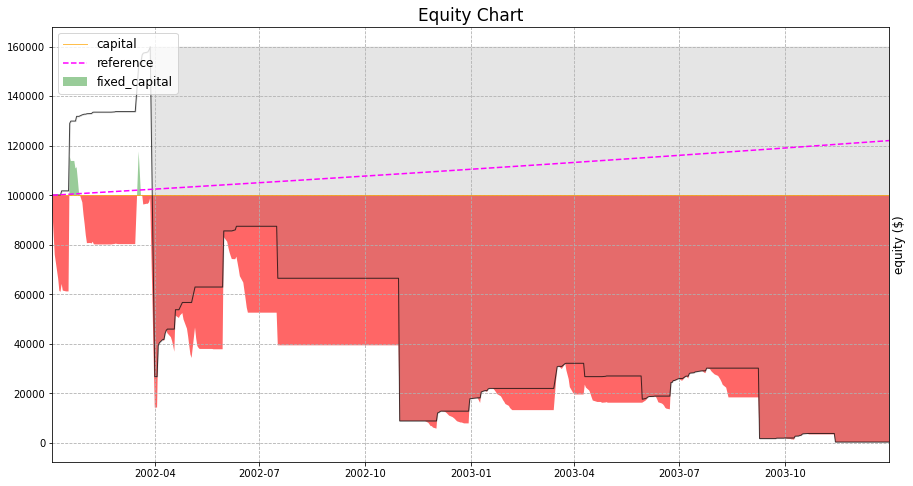

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))
ax.fill_between(x,p,fixed_capital, where=fixed_capital>=p, facecolor='green', alpha=0.4, interpolate=True, label='fixed_capital')
ax.fill_between(x, p, fixed_capital, where=fixed_capital<p, facecolor='red', alpha=0.6, interpolate=True)
ax.fill_between(x, capital, max_capital, color='grey', alpha=0.2)

ax.plot(x, principal, color='orange',alpha=0.7, linewidth=1, label='capital')
ax.plot(x, capital, color='black',alpha=0.7, linewidth=1)

ax.set_xlim([x.min(), x.max()])

#reference curve
rate = 0.1 #annual interest rate
refx = (x-x[0])/np.timedelta64(365,'D')
refy = p*np.exp(rate*refx)
ax.plot(x, refy, color='magenta', linestyle='--', label='reference')

#labels
ax.legend(loc='upper left', fontsize='large')
ax.set_title('Equity Chart', fontsize=17)

#ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('equity ($)', fontsize=12)
ax.yaxis.set_label_position("right")
#style
ax.grid(linestyle='--')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.tick_right()
fig.autofmt_xdate()
        
plt.show() 


In [11]:
class test:
    def __repr__(self):
        a={'a':1,'b':'sdf'}
        return f'{a}'

In [12]:
a=test()

In [13]:
b=[]

In [14]:
b.append(a)

In [17]:
b[0].name

11

In [16]:
a.name = 11

In [ ]:
trades = system.trades.book.statements

In [ ]:
trades = [trade for trade in trades if trade['result'] != 'REJECT']

In [ ]:
quote = trader.quotes['AD'].loc[today]

In [ ]:
quote

In [ ]:
trader.run()

In [ ]:
system.trades.book.statements

In [ ]:
price = quote['open']+round(diff*0.25)*instruments['AD'].tickunit

In [ ]:
round(price, 5)

In [ ]:
a={'b', 'c'}

In [ ]:
a['b'] = 1

In [ ]:
b['b'] = 'fffdd'

In [ ]:
a

In [ ]:
b

In [ ]:
c

In [ ]:
c.append(5)

In [ ]:
instruments.get_symbols('srf')

In [ ]:
type(trader.quotes)

In [ ]:
system.metrics.attrs['type']